In [2]:
import pandas as pd
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [9]:
#feature transformation
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Select the categorical columns for feature encoding
categorical_cols = ['sales_channel', 'trip_type', 'route', 'booking_origin']

# Create a new DataFrame to store the encoded features
encoded_data = pd.DataFrame()

# Create a dictionary to store the mapping for each categorical column
mapping_dict = {}

# Perform label encoding for each categorical column and store the mapping
for col in categorical_cols:
    label_encoder = LabelEncoder()
    encoded_feature = label_encoder.fit_transform(df[col])
    encoded_data[col] = encoded_feature
    mapping_dict[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Add the remaining non-categorical columns to the encoded DataFrame
non_categorical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour','flight_day', 'wants_extra_baggage',
                        'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']
encoded_data[non_categorical_cols] = df[non_categorical_cols]

# Print the encoded DataFrame
print(encoded_data)

# Print the mapping used for encoding
for col, mapping in mapping_dict.items():
    print(f"\nMapping for {col}:")
    for category, encoded_value in mapping.items():
        print(f"{category} : {encoded_value}")


       sales_channel  trip_type  route  booking_origin  num_passengers  \
0                  0          2      0              61               2   
1                  0          2      0              61               1   
2                  0          2      0              36               2   
3                  0          2      0              61               1   
4                  0          2      0              36               2   
...              ...        ...    ...             ...             ...   
49995              0          2    720               4               2   
49996              0          2    720               4               1   
49997              0          2    720               4               1   
49998              0          2    720               4               1   
49999              0          2    720               4               1   

       purchase_lead  length_of_stay  flight_hour  flight_day  \
0                262              19          

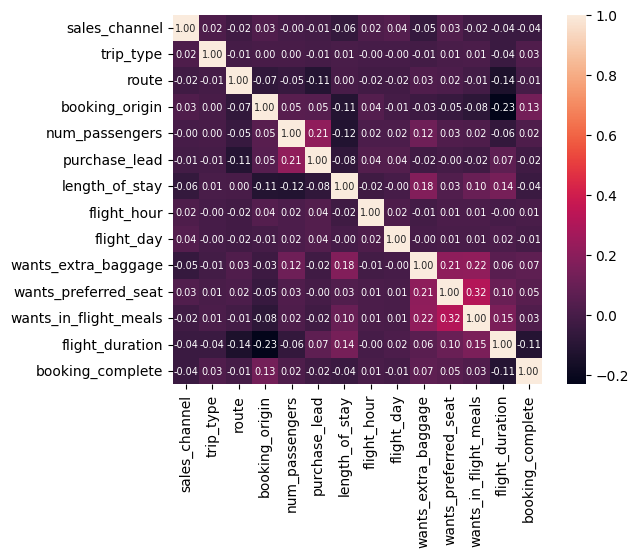

In [12]:
#corelation matrix to find out redundant features
import numpy as np
import seaborn as sns
cm = np.corrcoef(encoded_data.values.T)
# print(cm)
hm=sns.heatmap(cm,cbar=True,annot=True, square=True, fmt='.2f', annot_kws=
{'size': 7},yticklabels=encoded_data.columns, xticklabels=encoded_data.columns)

In [13]:
encoded_data

,sales_channel,trip_type,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,2,0,61,2,262,19,7,6,1,0,0,5.52,0
1,0,2,0,61,1,112,20,3,6,0,0,0,5.52,0
2,0,2,0,36,2,243,22,17,3,1,1,0,5.52,0
3,0,2,0,61,1,96,31,4,6,0,0,1,5.52,0
4,0,2,0,36,2,68,22,15,3,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2,720,4,2,27,6,9,6,1,0,1,5.62,0
49996,0,2,720,4,1,111,6,4,7,0,0,0,5.62,0
49997,0,2,720,4,1,24,6,22,6,0,0,1,5.62,0
49998,0,2,720,4,1,15,6,11,1,1,0,1,5.62,0


In [14]:
#ACCURACY CALCULATIONS

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select the features (attributes) and the target variable
features = encoded_data.drop('booking_complete', axis=1)
target = encoded_data['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8518


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#PRINTING TARGET VARIABLES ACTUAL VS PREDICTED
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select the features (attributes) and the target variable
features = encoded_data.drop('booking_complete', axis=1)
target = encoded_data['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Print the predicted and actual labels
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df)


       Actual  Predicted
33553       0          0
9427        0          0
199         0          0
12447       0          0
39489       0          0
...       ...        ...
28567       0          0
25079       0          0
18707       0          0
15200       0          0
5857        0          0

[10000 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                  Feature  Importance
5           purchase_lead    0.195887
2                   route    0.151033
7             flight_hour    0.142307
6          length_of_stay    0.126061
3          booking_origin    0.107197
8              flight_day    0.091794
12        flight_duration    0.069791
4          num_passengers    0.049343
11  wants_in_flight_meals    0.021175
10   wants_preferred_seat    0.017532
9     wants_extra_baggage    0.015093
0           sales_channel    0.011164
1               trip_type    0.001622


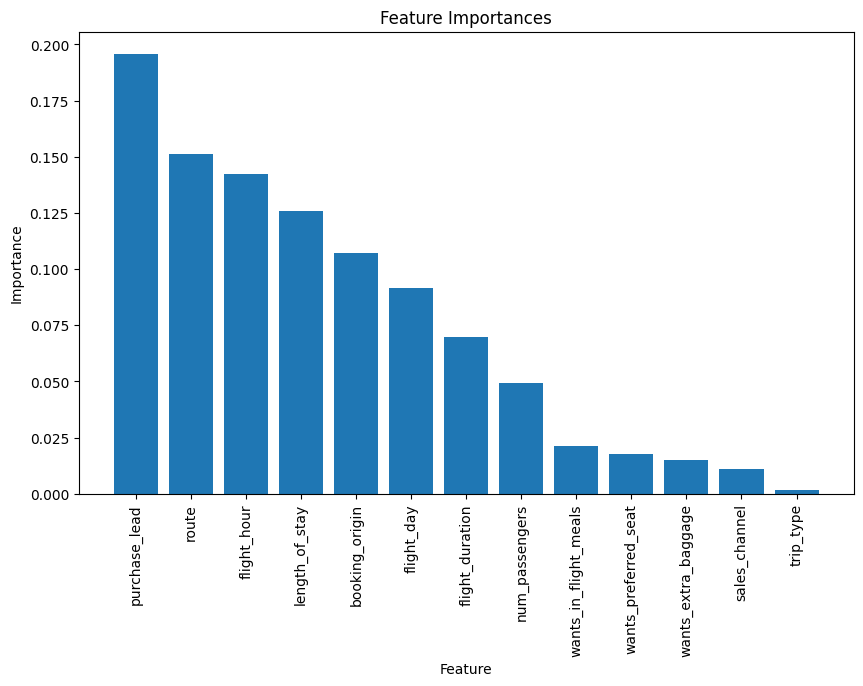

In [16]:
#FINDING MOST IMPORTANT FEATURES
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Select the features (attributes) and the target variable
features = encoded_data.drop('booking_complete', axis=1)
target = encoded_data['booking_complete']

# Initialize the random forest classifier
model = RandomForestClassifier()

# Fit the model to the data
model.fit(features, target)

# Get feature importances
importances = model.feature_importances_

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()
